## Titanic Data Set - Kaggle 

In [11]:
#%notebook "C:/Users/whitf/Documents/Python Scripts/my portfolio/kaggle/Titanic Machine Learning/Titanic_Dataset"

In [12]:
# load initial packages 
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
#import pandas_profiling
import random

In [13]:
# load data sets and change to lowercase 

train = pd.read_csv("C:/Users/whitf/Documents/Python Scripts/my portfolio/kaggle/Titanic Machine Learning/all/train_clean.csv")
train.columns = train.columns.str.lower() 


In [14]:
# plot with Matplotlib 
%matplotlib inline
rcParams['figure.figsize'] = 5,4 
sns.set_style('whitegrid')

In [15]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

Observe a statistical summary of each variable, original and new variables. 

In [16]:
train.describe()

,unnamed: 0,passengerid,survived,pclass,age,sibsp,parch,fare,age_imp_mean,age_imp_med,age_imp_interp,age_imp_samp
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118,29.361582,29.726061,29.358305
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015,13.019697,13.902353,14.839822
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.420000,0.420000,0.420000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,22.000000,21.000000,20.000000
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,28.000000,28.500000,28.000000
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,35.000000,38.000000,38.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,80.000000,80.000000,80.000000


#### Pclass - Ticket class 

In [17]:
#What is the count of each category in Pclass?
train["pclass"].value_counts() # find most freq

3    491
1    216
2    184
Name: pclass, dtype: int64

Pclass appears to have adequate signal across each class.  

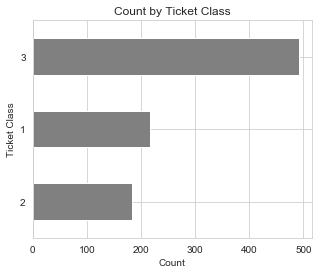

In [18]:
train['pclass'].value_counts().plot(kind='barh',color='grey').invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Ticket Class')
plt.title('Count by Ticket Class')
plt.show()

#### Pclass and Survived 

In [19]:
#What is the relationship between Pclass and Survived? 
pd.crosstab(train['survived'], train['pclass']).apply(lambda x: x/x.sum(), axis=1).round(2)

pclass,1,2,3
survived,,,
0,0.15,0.18,0.68
1,0.40,0.25,0.35


In [20]:
 # get rid of unused data
import gc
gc.collect()

2081

#### Age_Imp_Samp (New variable to be used for modeling) and Survived 

Observe the new variable, Age_Imp_Samp and the target, Survived.  Refer to 'Titanic_Dataset - Part I Data Understanding and Data Quality' for the univariate analysis of the original variable, Age.

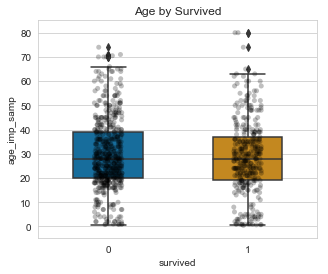

In [21]:
# What is the relationship between Survived and Age? 

# make boxplot with Seaborn
bplot=sns.boxplot(y='age_imp_samp', x='survived', 
                 data=train, 
                 width=0.5,
                 palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='age_imp_samp', x='survived', 
                   data= train, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.25,
                   color='black')
plt.title('Age by Survived')
plt.show()

The mean age of those who Survived are 30 and 28 years old for non-survivors and survivors respectively. 

In [37]:
#What is the average oge of the Survived?
train.groupby('survived')['age'].mean().round(2) # proportion of survivors/nonsurvivors

survived
0    30.63
1    28.34
Name: age, dtype: float64

#### Sex

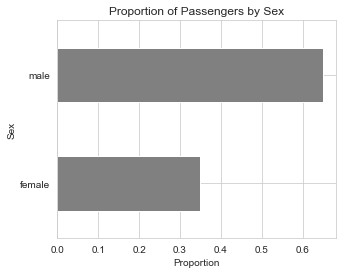

In [38]:
sex_prop.plot(kind='barh',color='grey').invert_yaxis()
plt.xlabel('Proportion')
plt.ylabel('Sex')
plt.title('Proportion of Passengers by Sex')
plt.show()

Below is the relative frequency of male and females aboard the ship 

In [43]:
# #What is the relative frequency of each category?
sex_prop = (train["sex"].value_counts()/ len(train)).round(2) 
sex_cnt = train["sex"].value_counts()

# relative frequency 
pd.DataFrame(dict(sex_cnt = sex_cnt, sex_prop = sex_prop))

,sex_cnt,sex_prop
1,577,0.65
0,314,0.35


#### Sex and Survived

Of those that Survived, 0.68 are women and 0.32 are men. 

In [25]:
# what is the relationship between Survived and Sex? 
pd.crosstab(train['survived'], train['sex']).apply(lambda x: x/x.sum(), axis=1).round(2)

sex,female,male
survived,,
0,0.15,0.85
1,0.68,0.32


#### Fare 

Observe the distribution of fares, peaking around 30. 

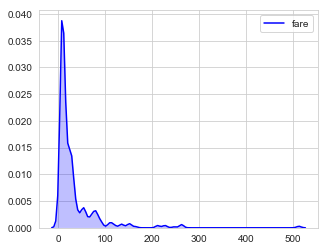

In [26]:
density_p =sns.kdeplot(train['fare'], shade=True, color="blue")

In [27]:
#comparison of original vs imputed 
train['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

#### Fare and Survived

The average fare of survivors are 48.40. Referencing comments in 'Titanic_Dataset - Part I Data Understanding and Data Quality' less tragedy occurred for persons on the upper decks. 

In [28]:
#What is the average fare of the Survived?
train.groupby('survived')['fare'].mean().round(2) # proportion of survivors/nonsurvivors

survived
0    22.12
1    48.40
Name: fare, dtype: float64

#### Embarked_Imp

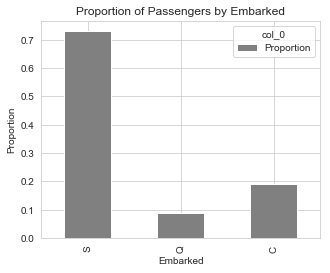

In [46]:
(survived_prop/survived_prop.sum()).round(2).plot(kind='bar',color='grey').invert_xaxis()
plt.xlabel('Embarked')
plt.ylabel('Proportion')
plt.title('Proportion of Passengers by Embarked')
plt.show()

Southampton accounted for 0.73 of the passengers aboard. 

In [29]:
# What is the relative frequency of embarked_imp?

survived_prop = pd.crosstab(index = train["embarked_imp"], columns="Proportion") #crosstab & count
(survived_prop/survived_prop.sum()).round(2) #imbalanced data set 

col_0,Proportion
embarked_imp,
C,0.19
Q,0.09
S,0.73


#### Parch (Parent / Child), Sex and Survived Heatmap

Single males are the largest non-surviving group at 400 count. No instance of males outpacing females in Survived. 

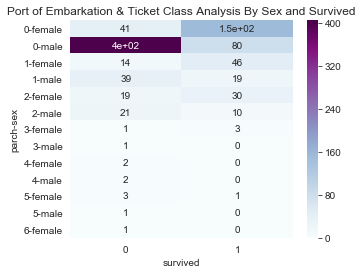

In [31]:
sns.heatmap(pd.crosstab([train.parch, train.sex], [train.survived]),
            cmap="BuPu", annot=True, cbar=True)
plt.title('Port of Embarkation & Ticket Class Analysis By Sex and Survived')
plt.show()

#### Embarked, Ticket Class, Sex and Survived Heatmap

Viewing the data by place of embarking and ticket class, it is evident that persons with a ticket class of 3 (lower deck) did not survive relative to those with ticket classes 1 or 2 (upper decks).  A great deal of tragedy occured among those that embarked at Southampton. Not to mention, those who embarked at Southampton and had a lower deck ticket, males had a 233 count and females had a 55 count. 

Persons who embarked at Queenstown with upper deck tickets experienced the least tragedy.  

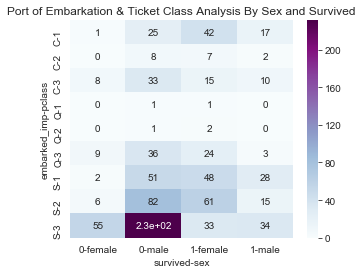

In [32]:
sns.heatmap(pd.crosstab([train.embarked_imp, train.pclass], [train.survived, train.sex]),
            cmap="BuPu", annot=True, cbar=True)
plt.title('Port of Embarkation & Ticket Class Analysis By Sex and Survived')

plt.show()

### Preprocessing 

Necessary step to convert categorical data.

In [33]:
# How do you prepare the data for modeling? 

from sklearn import preprocessing, metrics

# select all categorical predictors and encode (LabelEncoder) like factoring in R
train_categorical = train.select_dtypes(include = ['object'])
train_categorical = train_categorical.drop(columns=['name','cabin', 'embarked'])
train_categorical.head()

,sex,ticket,embarked_imp
0,male,A/5 21171,S
1,female,PC 17599,C
2,female,STON/O2. 3101282,S
3,female,113803,S
4,male,373450,S


In [34]:
lab = preprocessing.LabelEncoder()
train_categorical = train_categorical.apply(lab.fit_transform)

In [35]:
# view data after factoring or preprocessing

train = train.drop(train_categorical.columns, axis=1)
train = pd.concat([train,train_categorical],axis=1)
train.head()

,unnamed: 0,passengerid,survived,pclass,name,age,sibsp,parch,fare,cabin,embarked,duplicate_rows,age_imp_mean,age_imp_med,age_imp_interp,age_imp_samp,sex,ticket,embarked_imp
0,0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,S,False,22.0,22.0,22.0,22.0,1,523,2
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,C,False,38.0,38.0,38.0,38.0,0,596,0
2,2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,S,False,26.0,26.0,26.0,26.0,0,669,2
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,S,False,35.0,35.0,35.0,35.0,0,49,2
4,4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,NaN,S,False,35.0,35.0,35.0,35.0,1,472,2


In [36]:
# glance at the transformation of the categorical data from preprocessing
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
unnamed: 0        891 non-null int64
passengerid       891 non-null int64
survived          891 non-null int64
pclass            891 non-null int64
name              891 non-null object
age               714 non-null float64
sibsp             891 non-null int64
parch             891 non-null int64
fare              891 non-null float64
cabin             204 non-null object
embarked          889 non-null object
duplicate_rows    891 non-null bool
age_imp_mean      891 non-null float64
age_imp_med       891 non-null float64
age_imp_interp    891 non-null float64
age_imp_samp      891 non-null float64
sex               891 non-null int64
ticket            891 non-null int64
embarked_imp      891 non-null int64
dtypes: bool(1), float64(6), int64(9), object(3)
memory usage: 126.2+ KB


In [47]:
train.to_csv('C:/Users/whitf/Documents/Python Scripts/my portfolio/kaggle/Titanic Machine Learning/all/train_model_data.csv')